In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 

In [253]:
df_true = pd.read_csv('True.csv')

In [254]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [255]:
df_true.shape

(21417, 4)

In [256]:
df_fake = pd.read_csv('Fake.csv')

In [257]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [258]:
df_fake.shape

(23481, 4)

# Data Cleaning

In [259]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [260]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


Since we will be basing our model on text data, out column are not relevant to our model; therefor all other columns will be drop except "text".

In [261]:
df_fake =  df_fake.drop_duplicates() #dropping duplicated values

In [262]:
df_fake = df_fake.dropna() #dropping nan values

In [263]:
df_true = df_true.dropna() #dropping nan values

In [264]:
df_fake.info() #checking to see if nan values are dropped 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23478 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23478 non-null  object
 1   text     23478 non-null  object
 2   subject  23478 non-null  object
 3   date     23478 non-null  object
dtypes: object(4)
memory usage: 917.1+ KB


In [265]:
df_true.info() #checking to see if nan values are dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [266]:
df_fake = df_fake.drop(columns=['title', 'subject', 'date']) #dropping unused variables

In [267]:
df_fake.sample(5) #sampling the dataset

,text
1596,Our White House is currently occupied by someo...
15928,The FBI is out of control. It is stunning tha...
4766,Donald Trump s signature issue since he began ...
9280,A supervisory special agent who is now under s...
6466,Right after Ted Cruz suspended his presidentia...


In [268]:
df_true = df_true.drop(columns=['title', 'date','subject'])

In [269]:
df_true.sample()

,text
7700,"DORAL, Fla. (Reuters) - U.S. Republican presi..."


We will add a new column that will either be 0 or 1 based on if the news is fake or real. Fake news will be given 0 and real news will be given 1. 

In [270]:
df_fake['Target'] = 0 #adding target column to the dataset

In [271]:
df_fake.sample(5) #sampling the data

,text,Target
18278,The mainstream media will never show you both ...,0
13934,One of the most interesting and insightful pie...,0
1715,McCarthyism has returned.Donald Trump is liter...,0
22613,21st Century Wire says The following video pre...,0
19471,When an audience member asks Kellyanne Conway ...,0


In [272]:
df_true['Target'] = 1 #adding target column to the data

In [273]:
df_true.sample(5) #sample of the dataset aftering adding "Target" column

,text,Target
6589,WASHINGTON (Reuters) - President-elect Donald ...,1
19436,LISBON (Reuters) - Colombian police have arres...,1
8563,"MIDDLETOWN, CONN. - Two years ago, Judy Konopk...",1
3416,(Reuters) - U.S. President Donald Trump’s pick...,1
1017,WASHINGTON (Reuters) - President Donald Trump’...,1


Now we will concat both dataset into metadata

In [274]:
data = pd.concat([df_fake, df_true]) #concat the two dataset

In [275]:
data.sample(5) #sample of the dataset

,text,Target
15152,"DANANG, Vietnam (Reuters) - Philippine Preside...",1
9425,"Only one day ago, FOX News published a factual...",0
10445,"BEVERLY HILLS, Calif (Reuters) - Even as U.S. ...",1
13542,BEIRUT (Reuters) - Dozens of mortar bombs land...,1
1688,WASHINGTON (Reuters) - U.S. Defense Secretary ...,1


# EDA

In [276]:
data

,text,Target
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [277]:
data['Target'].value_counts() 

0    23478
1    21417
Name: Target, dtype: int64

([<matplotlib.patches.Wedge at 0x7fdd9e6147f0>,
 [Text(-0.07925311595859819, 1.09714125964292, 'Real'),
  Text(0.07925311595859781, -1.09714125964292, 'Fake')],
 [Text(-0.04322897234105355, 0.5984406870779563, '52.30'),
  Text(0.04322897234105334, -0.5984406870779563, '47.70')])

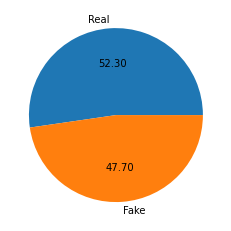

In [278]:
plt.pie(data['Target'].value_counts(), labels=['Real', 'Fake'], autopct="%0.2f") #pie plot of the data

Observation : The data tells us that is a slight imbalance in the data. There is more data that is real than fake news. 

In [279]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jawadkhattak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [280]:
data['NumberOfCharacters'] = data['text'].apply(len) #Finding length of each text

In [281]:
data.sample(5) #sampling the data to see if the new variable is added

,text,Target,NumberOfCharacters
906,While spouses are a tradition at the G-20 Summ...,0,1827
4962,"Once again, Republicans are throwing a hissy f...",0,3480
3153,Donald Trump once said that he loves the poor...,0,7027
17425,MOSCOW (Reuters) - Politicians from North and ...,1,2224
13132,The Imperial Presidency continues against the ...,0,2943


In [282]:
data.describe() #checking to see how our data look

,Target,NumberOfCharacters
count,44895.000000,44895.000000
mean,0.477046,2469.187950
std,0.499478,2171.663707
min,0.000000,1.000000
25%,0.000000,1234.000000
50%,0.000000,2186.000000
75%,1.000000,3105.500000
max,1.000000,51794.000000


The statistical analysis of the dataframe shows that there is/are text that has only one word. This won't help us our modle so we will drop text that length of 1. 

In [283]:
data[data['text'].str.len() <= 1]

,text,Target,NumberOfCharacters
10923,,0,1
11041,,0,1
11190,,0,1
11225,,0,1
11236,,0,1
...,...,...,...
21826,,0,1
21827,,0,1
21857,,0,1
21873,,0,1


In [284]:
data[data['text'].str.len() <= 5]['text'].value_counts()

         627
           4
Ouch!      2
Name: text, dtype: int64

We will drop these text because they are too small to test our model upon. 

In [285]:
data.shape

(44895, 3)

In [286]:
data = data[data['text'].str.len() <= 5]['text'].drop

In [ ]:
data.value_